In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,Dropout,BatchNormalization, Flatten, Dense, MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2.4.1


In [3]:

cancer=datasets.load_breast_cancer()
#print(cancer.DESCR)
from sklearn.utils import shuffle 
data=pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
data=shuffle(data, random_state=0)

In [4]:
q=['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
   'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 
   'fractal_dimension_worst']
data=data.drop(q, axis=1)

In [5]:
data=data.drop(['Unnamed: 32', 'id'], axis = 1)

In [6]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['diagnosis']=label.fit_transform(data["diagnosis"])

In [7]:
y=data.diagnosis.values
#x_data=data.drop(['id'], axis=0)
x_data=data.drop(['diagnosis'], axis=1)
x_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,0.3906,0.9306,3.093,33.67,0.005414,0.022650,0.034520,0.013340,0.01705,0.004005
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,0.2084,1.3500,1.314,17.58,0.005768,0.008082,0.015100,0.006451,0.01347,0.001828
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,0.2142,0.6549,1.606,19.25,0.004837,0.009238,0.009213,0.010760,0.01171,0.002104
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,0.2300,0.6690,1.661,20.56,0.003169,0.013770,0.010790,0.005243,0.01103,0.001957
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,0.1839,2.3420,1.170,14.16,0.004352,0.004899,0.013430,0.011640,0.02671,0.001777


In [8]:
X_train,X_test,y_train,y_test=train_test_split(x_data,y,test_size=0.2,stratify=y)
print(X_train.shape)
print(X_test.shape)


(455, 20)
(114, 20)


In [9]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train=X_train.reshape(455,20,1)
X_test=X_test.reshape(114,20,1)


In [10]:
#MODEL1=> FLC from 16
from tensorflow.keras.layers import Input, LeakyReLU, ReLU
model=Sequential()
activation=LeakyReLU()
padding='valid'
b=0.15

model.add(Input(shape=(20,1)))
model.add(Dense(16, activation=activation))
#layer1
model.add(Conv1D(16, kernel_size=2, activation=activation))
model.add(BatchNormalization())
model.add(Dropout(b))
model.add(MaxPool1D(pool_size=2, strides=1, padding=padding))
#layer2
model.add(Conv1D(16, kernel_size=2, activation=activation))
model.add(BatchNormalization())
model.add(Dropout(b))
model.add(MaxPool1D(pool_size=2, strides=1, padding=padding))
model.add(BatchNormalization())
#layer3
model.add(Conv1D(32, kernel_size=2, activation=activation))
model.add(BatchNormalization())
model.add(Dropout(b))
model.add(MaxPool1D(pool_size=2, strides=1, padding=padding))
#layer4
model.add(Conv1D(32, kernel_size=2, activation=activation))
model.add(BatchNormalization())
model.add(Dropout(b))
model.add(MaxPool1D(pool_size=2, strides=1, padding=padding))
#layer5
model.add(Conv1D(64, kernel_size=2, activation=activation))
model.add(BatchNormalization())
model.add(Dropout(b))
model.add(MaxPool1D(pool_size=2, strides=1, padding=padding))

model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(b))

model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))

model.summary()
model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20, 16)            32        
_________________________________________________________________
conv1d (Conv1D)              (None, 19, 16)            528       
_________________________________________________________________
batch_normalization (BatchNo (None, 19, 16)            64        
_________________________________________________________________
dropout (Dropout)            (None, 19, 16)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 18, 16)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 17, 16)            528       
_________________________________________________________________
batch_normalization_1 (Batch (None, 17, 16)            6

In [11]:
epoch=50
history=model.fit(X_train,y_train,epochs=epoch,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
15/15 [==============================] - 3s 67ms/step - loss: 0.6987 - accuracy: 0.5067 - val_loss: 0.6700 - val_accuracy: 0.6316
Epoch 2/50
15/15 [==============================] - 0s 14ms/step - loss: 0.6804 - accuracy: 0.5836 - val_loss: 0.6581 - val_accuracy: 0.6316
Epoch 3/50
15/15 [==============================] - 0s 13ms/step - loss: 0.6306 - accuracy: 0.6117 - val_loss: 0.6568 - val_accuracy: 0.6316
Epoch 4/50
15/15 [==============================] - 0s 13ms/step - loss: 0.6219 - accuracy: 0.6447 - val_loss: 0.6553 - val_accuracy: 0.6316
Epoch 5/50
15/15 [==============================] - 0s 14ms/step - loss: 0.5655 - accuracy: 0.7191 - val_loss: 0.6530 - val_accuracy: 0.6316
Epoch 6/50
15/15 [==============================] - 0s 13ms/step - loss: 0.5444 - accuracy: 0.7583 - val_loss: 0.6497 - val_accuracy: 0.6316
Epoch 7/50
15/15 [==============================] - 0s 14ms/step - loss: 0.5368 - accuracy: 0.7492 - val_loss: 0.6443 - val_accuracy: 0.6316
Epoch 8/50
15

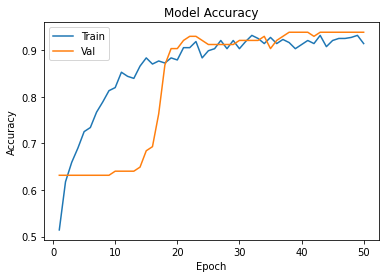

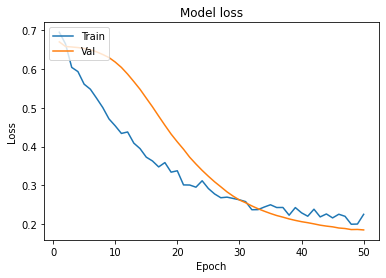

In [12]:
def plot_learningCurve(history,epoch):
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()
plot_learningCurve(history,epoch)